# Linear Regression - Overall deathrate accuracy.

In [1]:
#import all the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#read the data
df = pd.read_csv('C:\\Users\\madhu\\Desktop\\NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv')
df.head(2)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0


In [3]:
#add the all death columns :

count_deaths = df["Observed Deaths"] + df["Expected Deaths"] 
df["d_col"] = count_deaths
print(df.head(2))

   Year Cause of Death    State State FIPS Code  HHS Region Age Range  \
0  2005         Cancer  Alabama              AL           4      0-49   
1  2005         Cancer  Alabama              AL           4      0-49   

    Benchmark      Locality  Observed Deaths  Population  Expected Deaths  \
0  2005 Fixed           All            756.0   3148377.0            451.0   
1  2005 Fixed  Metropolitan            556.0   2379871.0            341.0   

   Potentially Excess Deaths  Percent Potentially Excess Deaths   d_col  
0                      305.0                               40.3  1207.0  
1                      217.0                               39.0   897.0  


# Model

In [4]:


#select two attributes we consider for the model:
df_Selected_col = df[["Population", "d_col"]]
df_Selected_col.head(3)

,Population,d_col
0,3148377.0,1207.0
1,2379871.0,897.0
2,768506.0,311.0


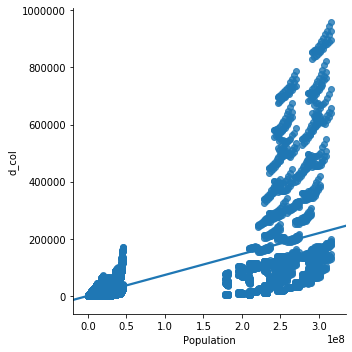

In [5]:
#Data Explore:
sns.lmplot(x ="Population", y ="d_col", data = df_Selected_col, order = 1, ci = None)

In [6]:
df_Selected_col.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [7]:
X = np.array(df_Selected_col['Population']).reshape(-1, 1)
y = np.array(df_Selected_col['d_col']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4908728722294192


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


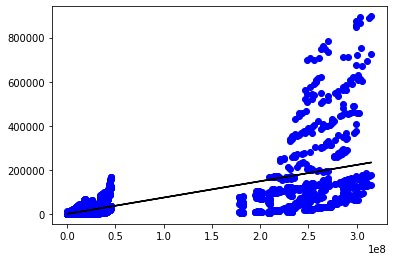

In [8]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

# Deathrate accuracy for Observed Deaths

In [43]:

#select two attributes we consider for the model:
df_Selected_col1 = df[["Population", "Observed Deaths"]]
df_Selected_col1.head(3)

,Population,Observed Deaths
0,3148377.0,756.0
1,2379871.0,556.0
2,768506.0,200.0


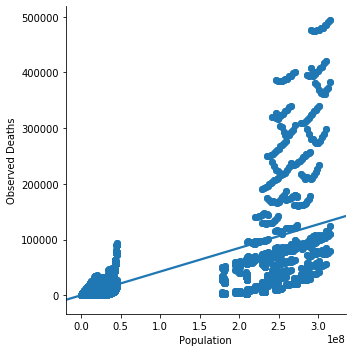

In [44]:
#Data Explore:
sns.lmplot(x ="Population", y ="Observed Deaths", data = df_Selected_col1, order = 1, ci = None)

In [45]:
df_Selected_col1.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [46]:
X = np.array(df_Selected_col1['Population']).reshape(-1, 1)
y = np.array(df_Selected_col1['Observed Deaths']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col1.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train1, y_train1)
print(regr.score(X_test1, y_test1))

0.5221322812169262


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


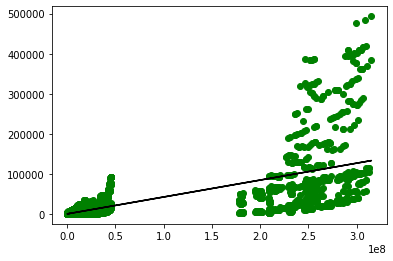

In [47]:
y_pred1 = regr.predict(X_test1)
plt.scatter(X_test1, y_test1, color ='g')
plt.plot(X_test1, y_pred1, color ='k')
  
plt.show()

# Deathrate Accuracy for Expected Deaths

In [48]:

#select two attributes we consider for the model:
df_Selected_col2 = df[["Population", "Expected Deaths"]]
df_Selected_col2.head(3)

,Population,Expected Deaths
0,3148377.0,451.0
1,2379871.0,341.0
2,768506.0,111.0


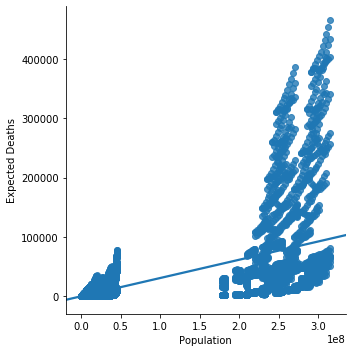

In [49]:
#Data Explore:
sns.lmplot(x ="Population", y ="Expected Deaths", data = df_Selected_col2, order = 1, ci = None)

In [50]:
df_Selected_col2.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [51]:
X = np.array(df_Selected_col2['Population']).reshape(-1, 1)
y = np.array(df_Selected_col2['Expected Deaths']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col2.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train2, y_train2)
print(regr.score(X_test2, y_test2))

0.46200354407799915


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


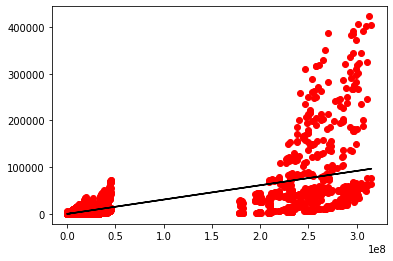

In [52]:
y_pred2 = regr.predict(X_test2)
plt.scatter(X_test2, y_test2, color ='r')
plt.plot(X_test2, y_pred2, color ='k')
  
plt.show()

# Variation in the death rate:

In [53]:
# Consider accuracy of expected death and observed death : their differnce provides the variation of death rate:
var = 0.52213-0.46200
print(var)

0.06012999999999996


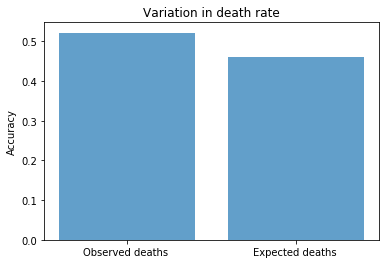

In [57]:
# graphical representation:
objects = ('Observed deaths ','Expected deaths ')
y_pos = np.arange(len(objects))
Acc = [0.52213,0.46200]
plt.bar(y_pos, Acc, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel("Accuracy")
plt.title("Variation in death rate")

plt.show()

# Linear regression : Dieases Columns

In [19]:
#Data retrieval from dataset 
Output= input("enter the Diease")
grp = df.groupby('Cause of Death') 
df3 = grp.get_group(Output) 
print(df3)

enter the DieaseCancer
        Year Cause of Death    State State FIPS Code  HHS Region Age Range  \
0       2005         Cancer  Alabama              AL           4      0-49   
1       2005         Cancer  Alabama              AL           4      0-49   
2       2005         Cancer  Alabama              AL           4      0-49   
3       2005         Cancer  Alabama              AL           4      0-49   
4       2005         Cancer  Alabama              AL           4      0-49   
...      ...            ...      ...             ...         ...       ...   
190939  2015         Cancer  Wyoming              WY           8      0-84   
190940  2015         Cancer  Wyoming              WY           8      0-84   
190941  2015         Cancer  Wyoming              WY           8      0-84   
190942  2015         Cancer  Wyoming              WY           8      0-84   
190943  2015         Cancer  Wyoming              WY           8      0-84   

         Benchmark         Locality  Obs

In [20]:

#select two attributes we consider for the model:
df_Selected_col3 = df3[["Population", "Expected Deaths"]]
df_Selected_col3.head(3)

,Population,Expected Deaths
0,3148377.0,451.0
1,2379871.0,341.0
2,768506.0,111.0


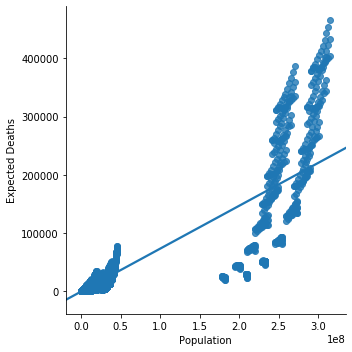

In [21]:
#Data Explore:
sns.lmplot(x ="Population", y ="Expected Deaths", data = df_Selected_col3, order = 1, ci = None)

In [22]:
df_Selected_col3.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [23]:
X = np.array(df_Selected_col3['Population']).reshape(-1, 1)
y = np.array(df_Selected_col3['Expected Deaths']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col3.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train3, y_train3)
print(regr.score(X_test3, y_test3))

0.7477498112104722


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


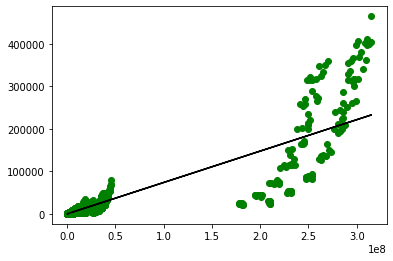

In [24]:
y_pred3 = regr.predict(X_test3)
plt.scatter(X_test3, y_test3, color ='g')
plt.plot(X_test3, y_pred3, color ='k')
  
plt.show()

# Linear Regression : Region accuracy

In [26]:
#Data retrieval from dataset 
Output1= input("enter the state")
grp = df.groupby('State') 
df4 = grp.get_group(Output1) 
print(df4)

enter the stateAlabama
        Year        Cause of Death    State State FIPS Code  HHS Region  \
0       2005                Cancer  Alabama              AL           4   
1       2005                Cancer  Alabama              AL           4   
2       2005                Cancer  Alabama              AL           4   
3       2005                Cancer  Alabama              AL           4   
4       2005                Cancer  Alabama              AL           4   
...      ...                   ...      ...             ...         ...   
202243  2015  Unintentional Injury  Alabama              AL           4   
202244  2015  Unintentional Injury  Alabama              AL           4   
202245  2015  Unintentional Injury  Alabama              AL           4   
202246  2015  Unintentional Injury  Alabama              AL           4   
202247  2015  Unintentional Injury  Alabama              AL           4   

       Age Range   Benchmark         Locality  Observed Deaths  Population  

In [27]:
#select two attributes we consider for the model:
df_Selected_col4 = df4[["Population", "Expected Deaths"]]
df_Selected_col4.head(3)

,Population,Expected Deaths
0,3148377.0,451.0
1,2379871.0,341.0
2,768506.0,111.0


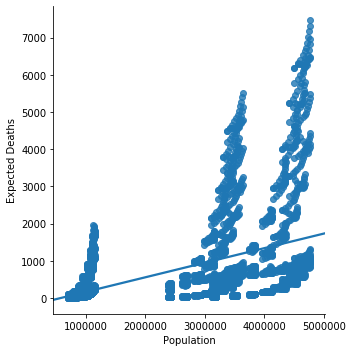

In [28]:
#Data Explore:
sns.lmplot(x ="Population", y ="Expected Deaths", data = df_Selected_col4, order = 1, ci = None)

In [29]:
df_Selected_col4.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [30]:
X = np.array(df_Selected_col4['Population']).reshape(-1, 1)
y = np.array(df_Selected_col4['Expected Deaths']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col4.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train4, y_train4)
print(regr.score(X_test4, y_test4))

0.20050020471059404


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


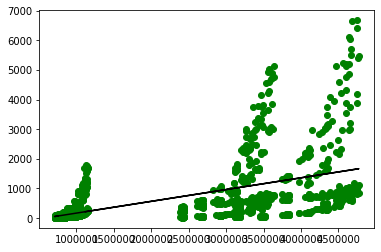

In [31]:
y_pred4 = regr.predict(X_test4)
plt.scatter(X_test4, y_test4, color ='g')
plt.plot(X_test4, y_pred4, color ='k')
  
plt.show()

# Linear Regression on locality:

In [32]:
#Data retrieval from dataset 
Output2= input("enter the Locality")
grp = df.groupby('Locality') 
df5 = grp.get_group(Output2) 
print(df5)

enter the LocalityAll
        Year        Cause of Death    State State FIPS Code  HHS Region  \
0       2005                Cancer  Alabama              AL           4   
3       2005                Cancer  Alabama              AL           4   
6       2005                Cancer  Alabama              AL           4   
9       2005                Cancer  Alabama              AL           4   
12      2005                Cancer  Alabama              AL           4   
...      ...                   ...      ...             ...         ...   
205905  2015  Unintentional Injury  Wyoming              WY           8   
205908  2015  Unintentional Injury  Wyoming              WY           8   
205911  2015  Unintentional Injury  Wyoming              WY           8   
205914  2015  Unintentional Injury  Wyoming              WY           8   
205917  2015  Unintentional Injury  Wyoming              WY           8   

       Age Range   Benchmark Locality  Observed Deaths  Population  \
0      

In [33]:

#select two attributes we consider for the model:
df_Selected_col5 = df5[["Population", "Expected Deaths"]]
df_Selected_col5.head(3)

,Population,Expected Deaths
0,3148377.0,451.0
3,3148377.0,421.0
6,3148377.0,451.0


In [34]:

#select two attributes we consider for the model:
df_Selected_col6 = df5[["Population", "Observed Deaths"]]
df_Selected_col6.head(3)

,Population,Observed Deaths
0,3148377.0,756.0
3,3148377.0,756.0
6,3148377.0,756.0


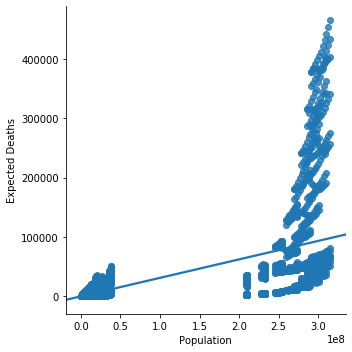

In [35]:
#Data Explore:
sns.lmplot(x ="Population", y ="Expected Deaths", data = df_Selected_col5, order = 1, ci = None)

In [36]:
df_Selected_col5.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [37]:
X = np.array(df_Selected_col5['Population']).reshape(-1, 1)
y = np.array(df_Selected_col5['Expected Deaths']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col5.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train5, y_train5)
print(regr.score(X_test5, y_test5))

0.47758111756456467


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


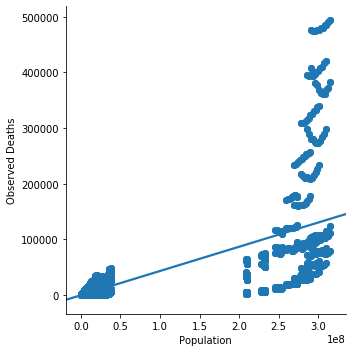

In [38]:
#Data Explore:
sns.lmplot(x ="Population", y ="Observed Deaths", data = df_Selected_col6, order = 1, ci = None)

In [39]:
df_Selected_col6.fillna(method ='ffill', inplace = True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [40]:
X = np.array(df_Selected_col6['Population']).reshape(-1, 1)
y = np.array(df_Selected_col6['Observed Deaths']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_Selected_col6.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train6, y_train6)
print(regr.score(X_test6, y_test6))

0.49778236195030223


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


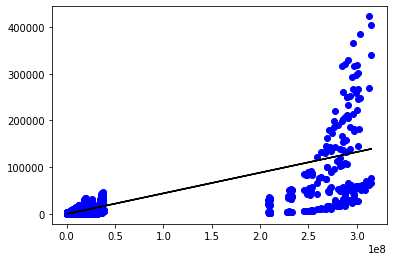

In [41]:
y_pred5 = regr.predict(X_test5)
plt.scatter(X_test5, y_test5, color ='b')
plt.plot(X_test5, y_pred5, color ='k')
  
plt.show()

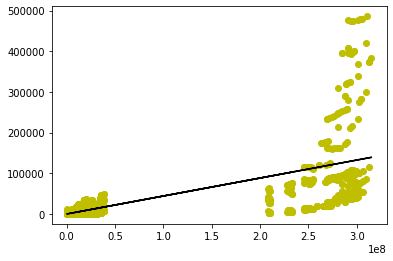

In [42]:
y_pred6 = regr.predict(X_test6)
plt.scatter(X_test6, y_test6, color ='y')
plt.plot(X_test6, y_pred6, color ='k')
  
plt.show()